In [45]:
!conda install -c blaze sqlite3
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

Solving environment: ...working... done

# All requested packages already installed.



In [46]:
conn = sqlite3.connect('data/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', conn, index_col='rental_id', parse_dates=['rental_date', 'return_date'])

In [22]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [26]:
# the mean of film_rental_duration ?
df['film_rental_duration'].mean()

4.935489902767389

<Axes: >

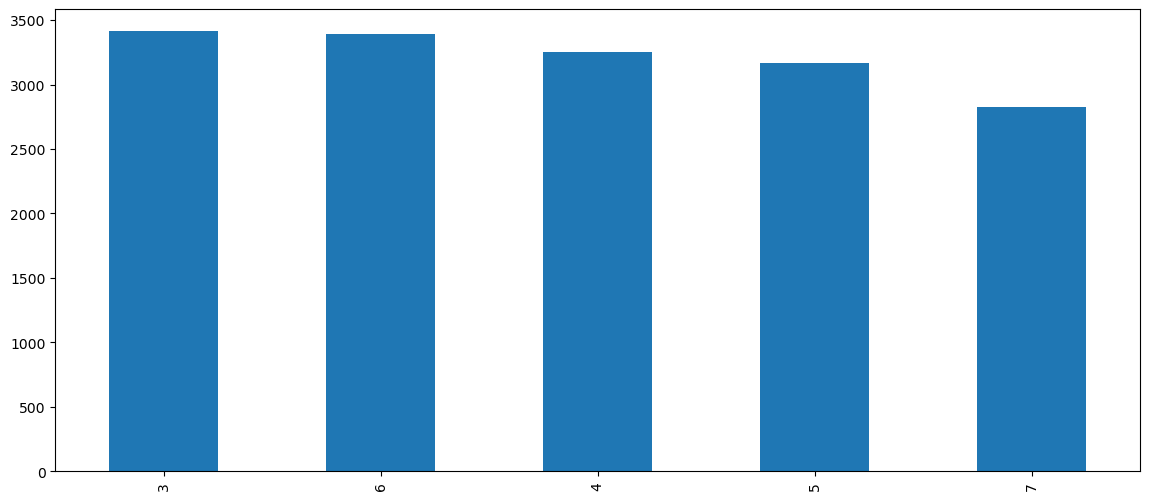

In [27]:
# the most common rental duration ?
# show the bar plot with all the durations
df['film_rental_duration'].value_counts().plot(kind='bar',figsize=(14,6))

<Axes: ylabel='film_rental_rate'>

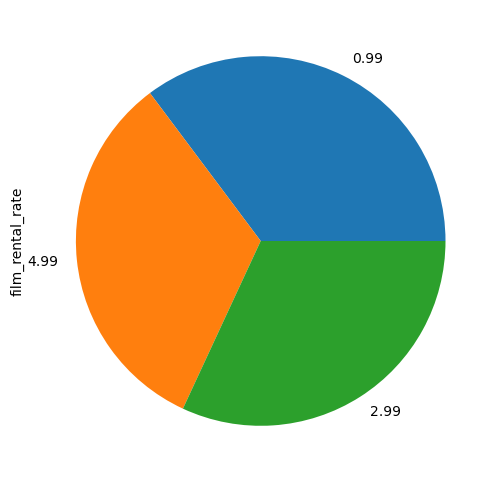

In [31]:
# the most common rental rate ?
# show a pie plot with all possible rental rates
df['film_rental_rate'].value_counts().plot(kind ='pie',figsize=(6,6))

<Axes: >

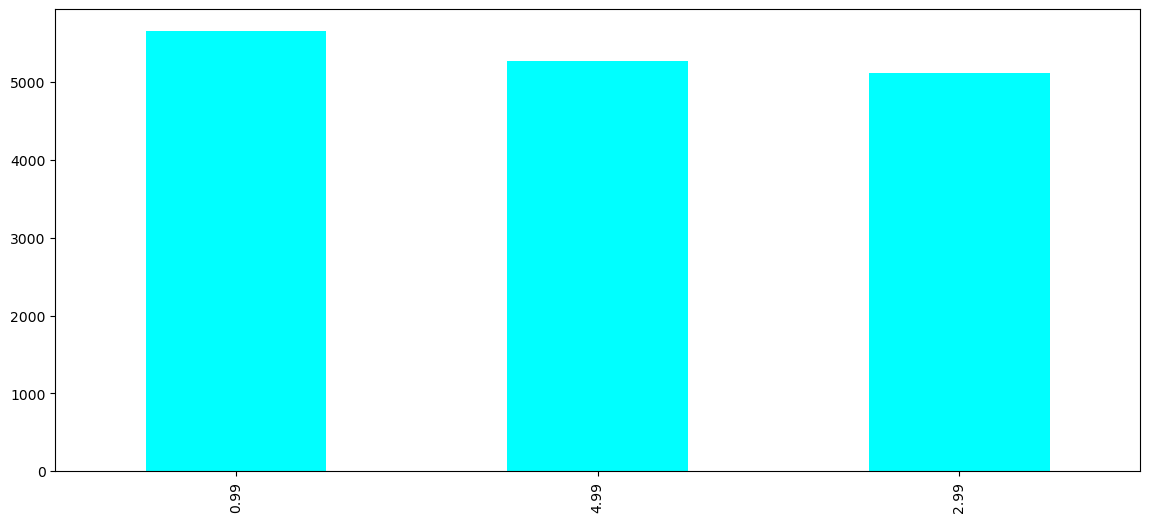

In [80]:
# show a bar plot with all possible rental rates.

df['film_rental_rate'].value_counts().plot(kind = 'bar',color = 'cyan', figsize = (14,6))

In [ ]:
# which plot you think fits the best in the case? why?
'''I think plot the best in the case is bar plot , because we have comparable all component,
neu chung ta dung pie plot thi ca ba thanh phan nhin kha bang nhau nen khong the so sanh chung mot
cach chinh xac'''

<Axes: >

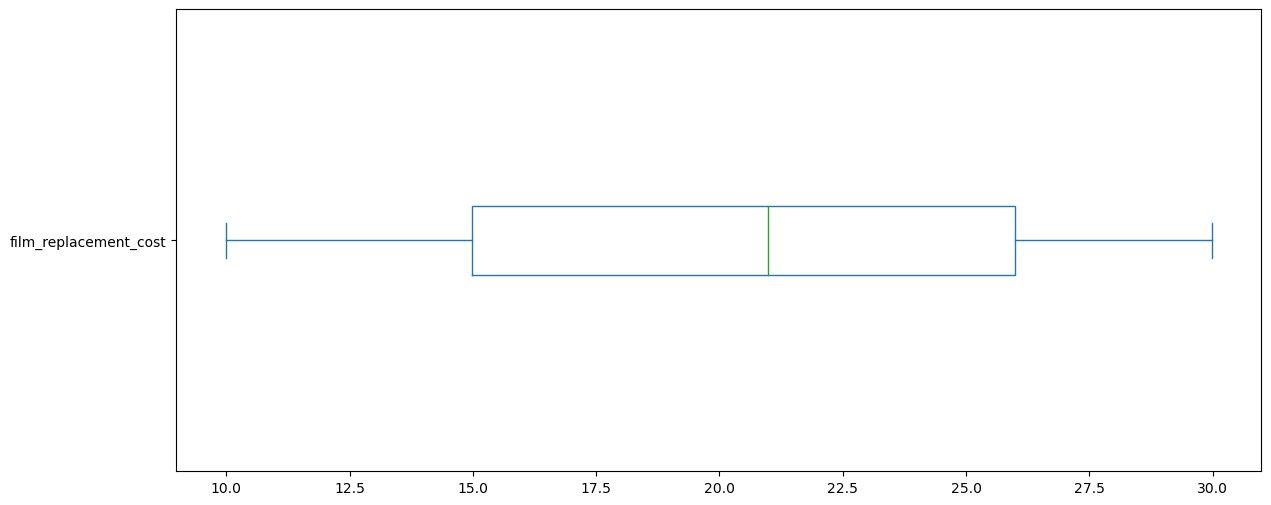

In [47]:
# how is the replacement cost distributed?
# show a box plot of the replacement costs.
df['film_replacement_cost'].plot(kind = 'box',vert = False , figsize=(14,6))

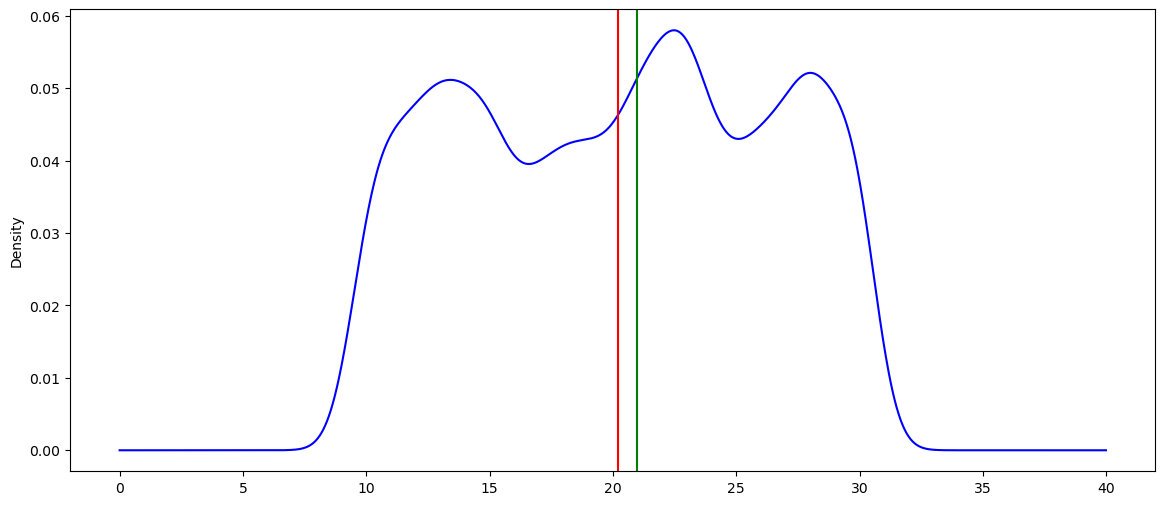

In [67]:
# show a density plot of the replacement costs.
ax = df['film_replacement_cost'].plot(kind = 'density',color = 'blue', figsize=(14,6))
ax.axvline(df['film_replacement_cost'].mean(),color='red')
ax.axvline(df['film_replacement_cost'].median(),color='green')

In [85]:
# Many films or each rating do we have ?
# show the raw counts or each film rating 
df['film_rating'].value_counts()

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

<Axes: title={'center': 'film Rating'}, xlabel='name', ylabel='score'>

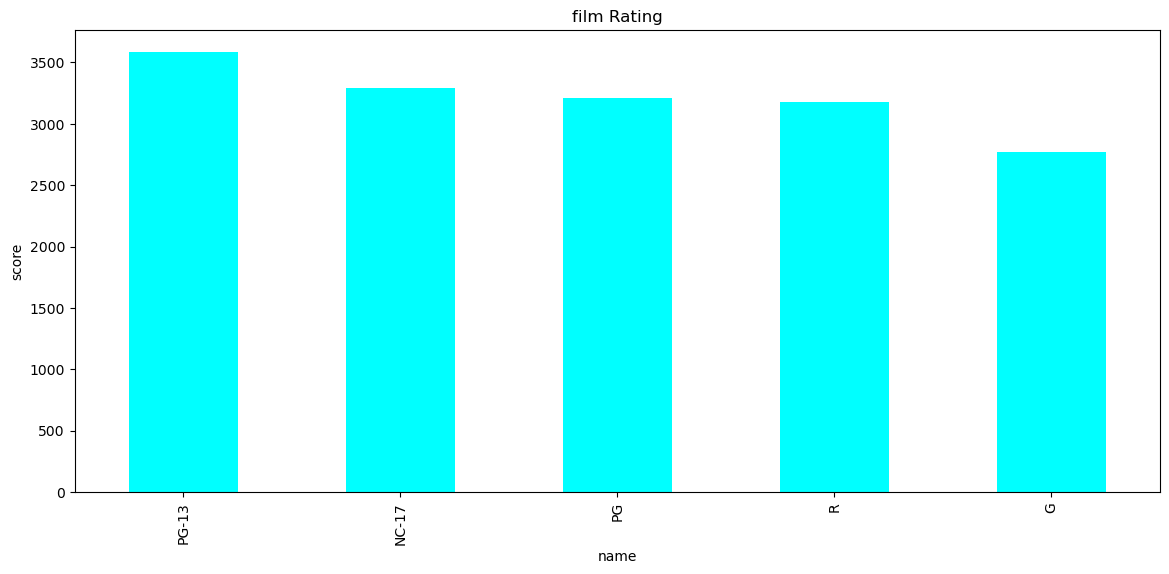

In [91]:
#show a bar plot with all possible film ratings
df['film_rating'].value_counts().plot(kind = 'bar',color = 'cyan',title = 'film Rating',xlabel = 'name',ylabel = 'score',figsize=(14,6))


<Axes: title={'center': 'film_replacement_cost'}, xlabel='[film_rating]'>

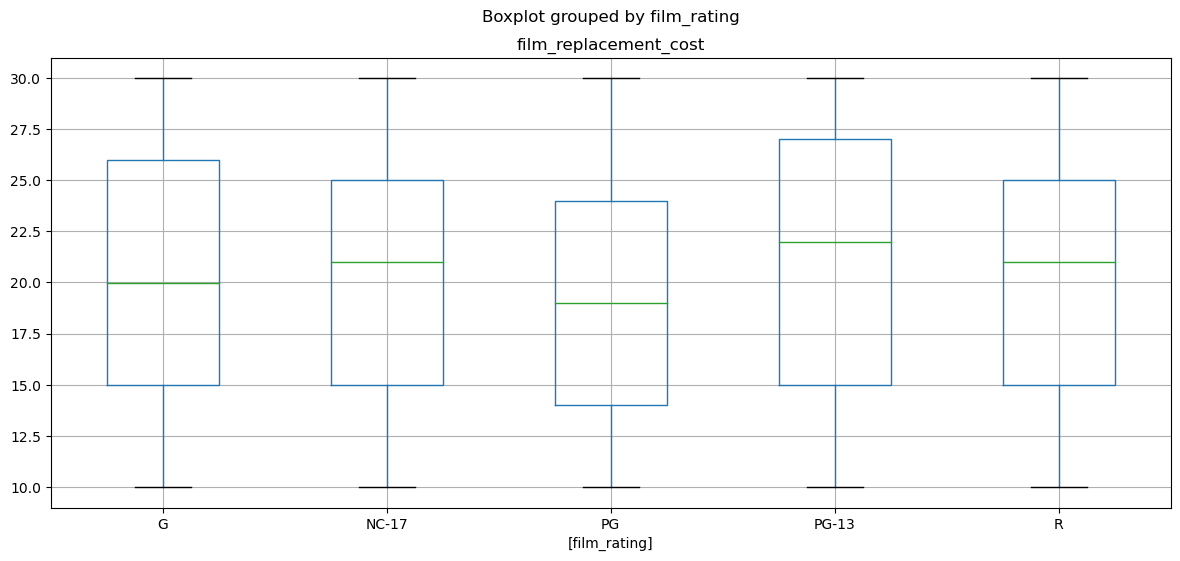

In [93]:
# show a grouped box plot per film rating with the film replacement costs.
df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(14,6))

In [95]:
# add and calculate a new rental_days column
df['rental_days'] = df[['rental_date','return_date']].apply(lambda x : (x[1] - x[0]).days , axis = 1 )
df['rental_days'].head()

rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

In [96]:
# analyze the distribution of rental_days
# calculate the mean of retal_days
df['rental_days'].mean()

4.525944139713763

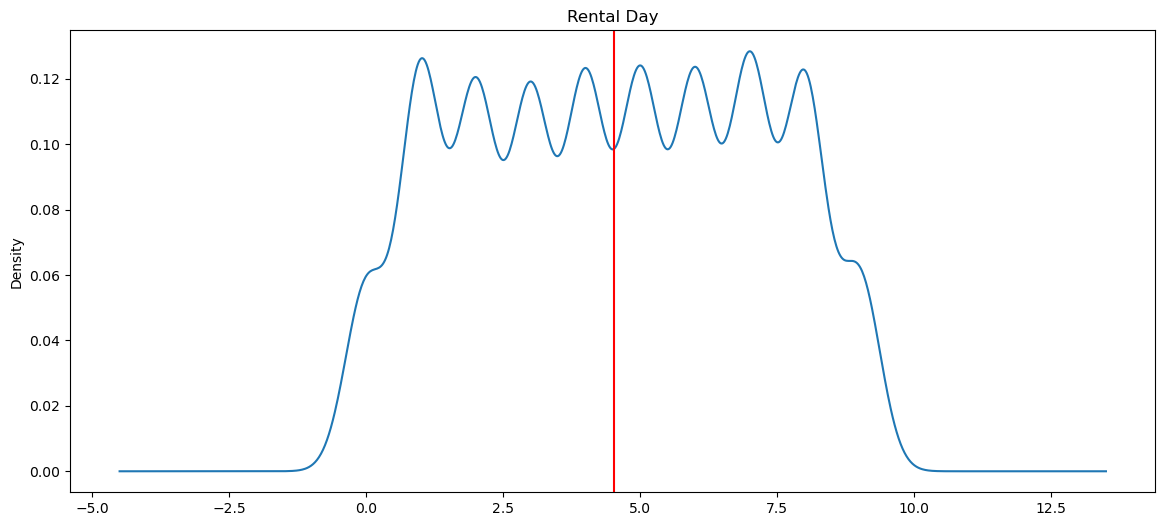

In [105]:
# show a density(KDE) of rentaldays
ax = df['rental_days'].plot(kind = 'density',title = 'Rental Day',xlabel = 'Day' ,figsize = (14,6))
ax.axvline(df['rental_days'].mean(),color = 'red')

In [121]:
'''Add and calculate a new film_daily_rental_rate column
This value should be the division of film_rental_rate by film_rental_duration.'''

df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']

df['film_daily_rental_rate'].head()

rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

In [119]:
# analyze the distribution of film_daily_rental_rate
# calculate the mean of film_daily_rental_rate
df['film_daily_rental_rate'].mean()

0.6458262471655329

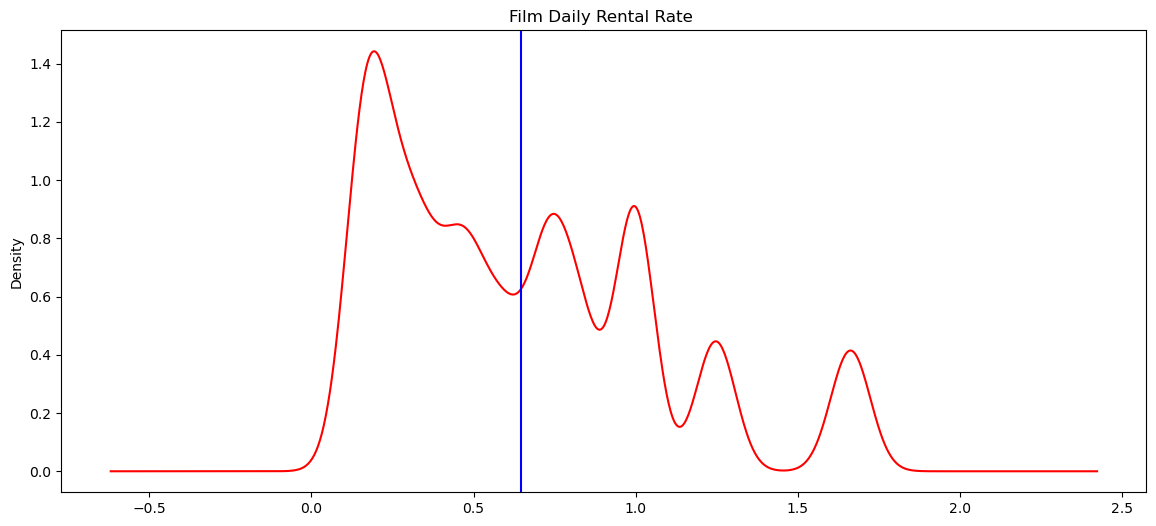

In [128]:
ax =  df['film_daily_rental_rate'].plot(kind = 'density',title = 'Film Daily Rental Rate ',xlabel = 'Score',color = 'red',figsize=(14,6))
ax.axvline(df['film_daily_rental_rate'].mean(),color = 'blue')

In [129]:
# list 10 films with the lowest daily rental rate
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min()].head(10)

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating,rental_days,film_daily_rental_rate
rental_id,,,,,,,,,,,,
18,2005-05-25 01:10:47,2005-05-31 06:35:47,MARTINEZ,1,Lethbridge,ROMAN PUNK,7,0.99,28.99,NC-17,6.0,0.141429
37,2005-05-25 04:44:31,2005-05-29 01:03:31,ELROD,2,Woodridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,3.0,0.141429
48,2005-05-25 06:20:46,2005-06-02 05:42:46,CASTRO,1,Lethbridge,GUN BONNIE,7,0.99,27.99,G,7.0,0.141429
74,2005-05-25 11:09:48,2005-05-26 12:23:48,TERRY,2,Woodridge,GREEDY ROOTS,7,0.99,14.99,R,1.0,0.141429
76,2005-05-25 11:30:37,2005-06-03 12:00:37,SMITH,2,Woodridge,PATIENT SISTER,7,0.99,29.99,NC-17,9.0,0.141429
87,2005-05-25 13:52:43,2005-05-29 11:12:43,ROBERT,2,Woodridge,GANDHI KWAI,7,0.99,9.99,PG-13,3.0,0.141429
117,2005-05-25 19:30:46,2005-05-31 23:59:46,MILLER,2,Woodridge,VALENTINE VANISHING,7,0.99,9.99,PG-13,6.0,0.141429
133,2005-05-25 21:48:30,2005-05-30 00:26:30,GILBERT,1,Lethbridge,BORROWERS BEDAZZLED,7,0.99,22.99,G,4.0,0.141429
148,2005-05-26 00:25:23,2005-06-01 19:29:23,BURNS,2,Woodridge,UNFORGIVEN ZOOLANDER,7,0.99,15.99,PG,6.0,0.141429


In [130]:
#many rentals were made in lethbridge city ?
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts()

PG-13    1849
NC-17    1625
R        1537
PG       1535
G        1377
Name: film_rating, dtype: int64

<Axes: >

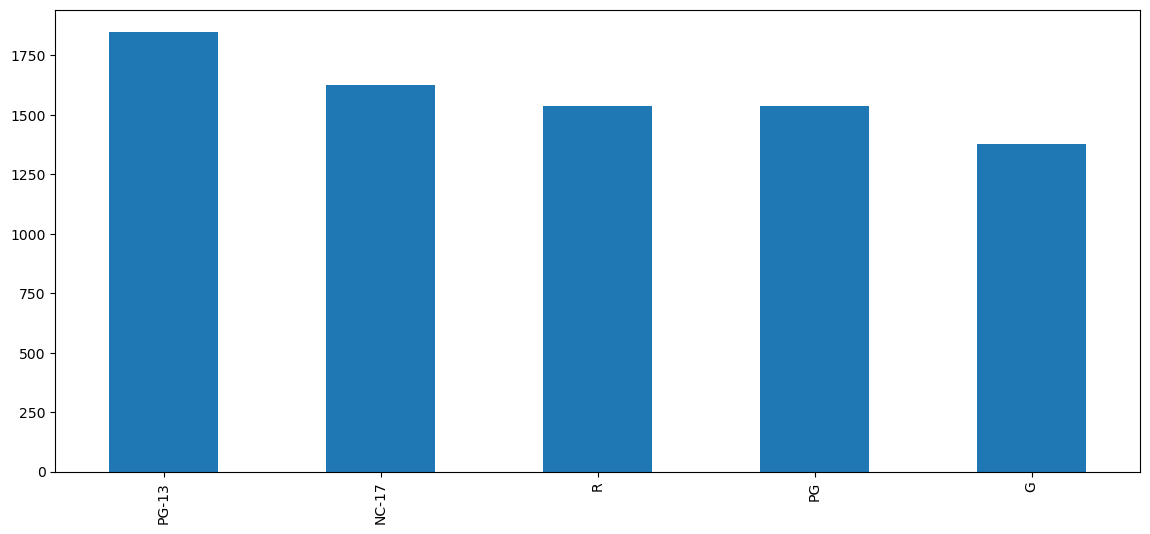

In [131]:
# show a bar plot with each film rating cout
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts().plot(kind = 'bar', title = 'rel',figsize= (14,6))